In [153]:
import pandas as pd

data=pd.read_csv("data.csv")
data.head()

,X1,X2,X3,M,TS00,TO00,TS01,TO01,TS02,TO02,...,TS10,TO10,TS11,TO11,TS12,TO12,TS13,TO13,TS14,TO14
0,-1.25,-0.88,2,14,14:00,22:27,18:00,14:37,13:00,09:39,...,10:00,21:29,10:00,08:47,15:00,10:06,10:00,09:14,NaN,NaN
1,-0.14,-3.21,0,1,17:00,17:11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.23,0.08,3,1,19:00,09:22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.38,-1.30,3,2,12:00,12:38,08:00,09:04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.50,0.22,2,6,14:00,21:59,11:00,17:01,15:00,23:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
data.describe()

,X1,X2,X3,M
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.001794,-0.002235,1.492400,7.989600
std,1.001449,1.417344,1.121247,4.314781
min,-4.380000,-7.280000,0.000000,1.000000
25%,-0.680000,-0.960000,0.000000,4.000000
50%,-0.000000,-0.010000,1.000000,8.000000
75%,0.670000,0.960000,2.000000,12.000000
max,4.110000,5.570000,3.000000,15.000000


### Data Pre-processing

Converting time features (TS and TO) to seconds

In [74]:
def get_sec(time_str):
    """Get Seconds from time."""
    try:
        h, m = time_str.split(':')
        return int(h) * 3600 + int(m) * 60
    except AttributeError as e:
        return None
# convert to secs
for col in data.columns[4:]:
    data[col]=data[col].apply(get_sec)

### TS (Time of sending email) converted to seconds wrt 00:00 hrs

In [75]:
slice_TS=data.loc[:, 'TS00':'TO14':2]
slice_TO=data.loc[:, 'TO00':'TO14':2]
slice_TS.head()


,TS00,TS01,TS02,TS03,TS04,TS05,TS06,TS07,TS08,TS09,TS10,TS11,TS12,TS13,TS14
0,50400,64800.0,46800.0,61200.0,39600.0,64800.0,50400.0,68400.0,50400.0,64800.0,36000.0,36000.0,54000.0,36000.0,NaN
1,61200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43200,28800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50400,39600.0,54000.0,36000.0,50400.0,28800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### TO (Time of opening email) converted to seconds wrt 00:00 hrs

In [76]:
slice_TO.head()

,TO00,TO01,TO02,TO03,TO04,TO05,TO06,TO07,TO08,TO09,TO10,TO11,TO12,TO13,TO14
0,80820,52620.0,34740.0,43080.0,28020.0,77220.0,35820.0,72780.0,70740.0,56520.0,77340.0,31620.0,36360.0,33240.0,NaN
1,61860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45480,32640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79140,61260.0,85620.0,42180.0,70920.0,64920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
slice_TS.columns=range(0,len (slice_TS.columns))
slice_TO.columns=range(0,len (slice_TO.columns))
diff_to_ts=slice_TO-slice_TS

Get diff between TO and TS matrices

In [78]:
def update_negative_diff (x):
    if x<0:
        return x+86400
    else:
        return x

# adding 24hrs if diff is negative
for col in diff_to_ts.columns:
    diff_to_ts[col]=diff_to_ts[col].apply(update_negative_diff)

In [79]:
def get_min(row):
    min_index=0
    for x in range (0,15):
        if row[x]<row[min_index]:
            min_index=x
    return min_index

min_ts_list=[]
for x in range (0,int (diff_to_ts.size/15)):
    min_index=get_min(diff_to_ts.loc[x])
    min_ts_list.append (slice_TS[min_index][x])   

Selecting minimum of diff as objective is to *minimize(TO-TS)*

In [80]:
data['min_ts']=min_ts_list

### Correlation Matrix

In [81]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\aJ\Anaconda3\lib\site-packages\matplotlib\colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


### Corr Matrix of processed DF

In [149]:
corr=data.drop (['TS00','TO00','TS01','TO01','TS02','TO02','TS03','TO03','TS04','TO04','TS05','TO05','TS06','TO06','TS07','TO07','TS08','TO08','TS09','TO09','TS10','TO10','TS11','TO11','TS12','TO12','TS13','TO13','TS14','TO14'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,X1,X2,X3,M,min_ts
X1,1,0.018,-0.02,-0.0023,-0.062
X2,0.018,1,0.001,0.0043,-0.12
X3,-0.02,0.001,1,0.016,0.012
M,-0.0023,0.0043,0.016,1,-0.03
min_ts,-0.062,-0.12,0.012,-0.03,1


### Feature Selection and Dataset split (Train, Eval)

In [82]:
from sklearn.model_selection import train_test_split

train_df=data.drop (['min_ts','M','TS00','TO00','TS01','TO01','TS02','TO02','TS03','TO03','TS04','TO04','TS05','TO05','TS06','TO06','TS07','TO07','TS08','TO08','TS09','TO09','TS10','TO10','TS11','TO11','TS12','TO12','TS13','TO13','TS14','TO14'], axis=1)
y=data.min_ts.values
x=train_df.values
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### Model Training: LightGBM Regressor (GBT Boosting)

In [83]:
import lightgbm

train_data = lightgbm.Dataset(x, label=y)
test_data = lightgbm.Dataset(x_test, label=y_test)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

evals_result = {}
gbm = lightgbm.train(params,
                train_data,
                num_boost_round=200,
                valid_sets=test_data,
                early_stopping_rounds=5,
                evals_result=evals_result,
                feature_name = ['X1','X2','X3'],
                categorical_feature=['X3'])  #treating X3 as categorical

C:\Users\aJ\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['X3']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\aJ\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's l1: 13419.6	valid_0's l2: 2.33056e+08
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 13414.4	valid_0's l2: 2.32878e+08
[3]	valid_0's l1: 13409.6	valid_0's l2: 2.32706e+08
[4]	valid_0's l1: 13409.4	valid_0's l2: 2.32685e+08
[5]	valid_0's l1: 13409.3	valid_0's l2: 2.32665e+08
[6]	valid_0's l1: 13406.9	valid_0's l2: 2.3257e+08
[7]	valid_0's l1: 13406.2	valid_0's l2: 2.32527e+08
[8]	valid_0's l1: 13403.1	valid_0's l2: 2.3236e+08
[9]	valid_0's l1: 13400	valid_0's l2: 2.32197e+08
[10]	valid_0's l1: 13397.7	valid_0's l2: 2.32105e+08
[11]	valid_0's l1: 13395.6	valid_0's l2: 2.32025e+08
[12]	valid_0's l1: 13393.5	valid_0's l2: 2.31937e+08
[13]	valid_0's l1: 13391.7	valid_0's l2: 2.3186e+08
[14]	valid_0's l1: 13391.3	valid_0's l2: 2.31834e+08
[15]	valid_0's l1: 13389.5	valid_0's l2: 2.3176e+08
[16]	valid_0's l1: 13389.4	valid_0's l2: 2.31745e+08
[17]	valid_0's l1: 13386.8	valid_0's l2: 2.31597e+08
[18]	valid_0's l1: 13386.7	valid_0's l2: 2.31584e+08


### Feature Importance and Eval_metrics plots

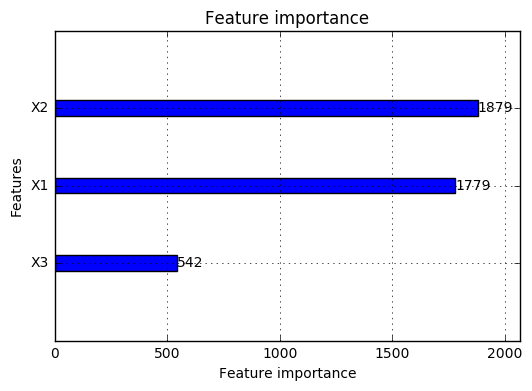

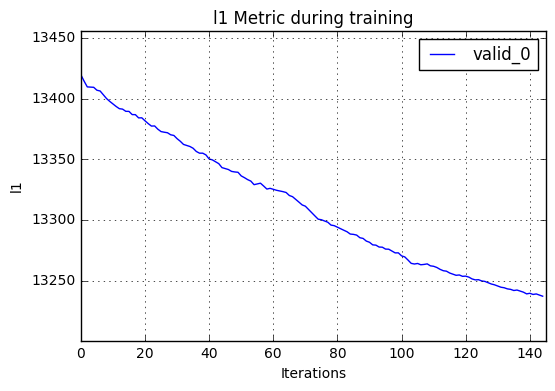

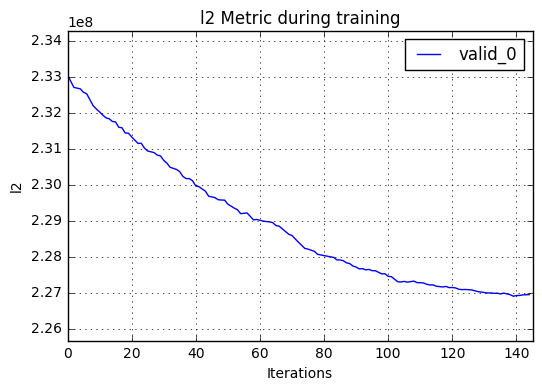

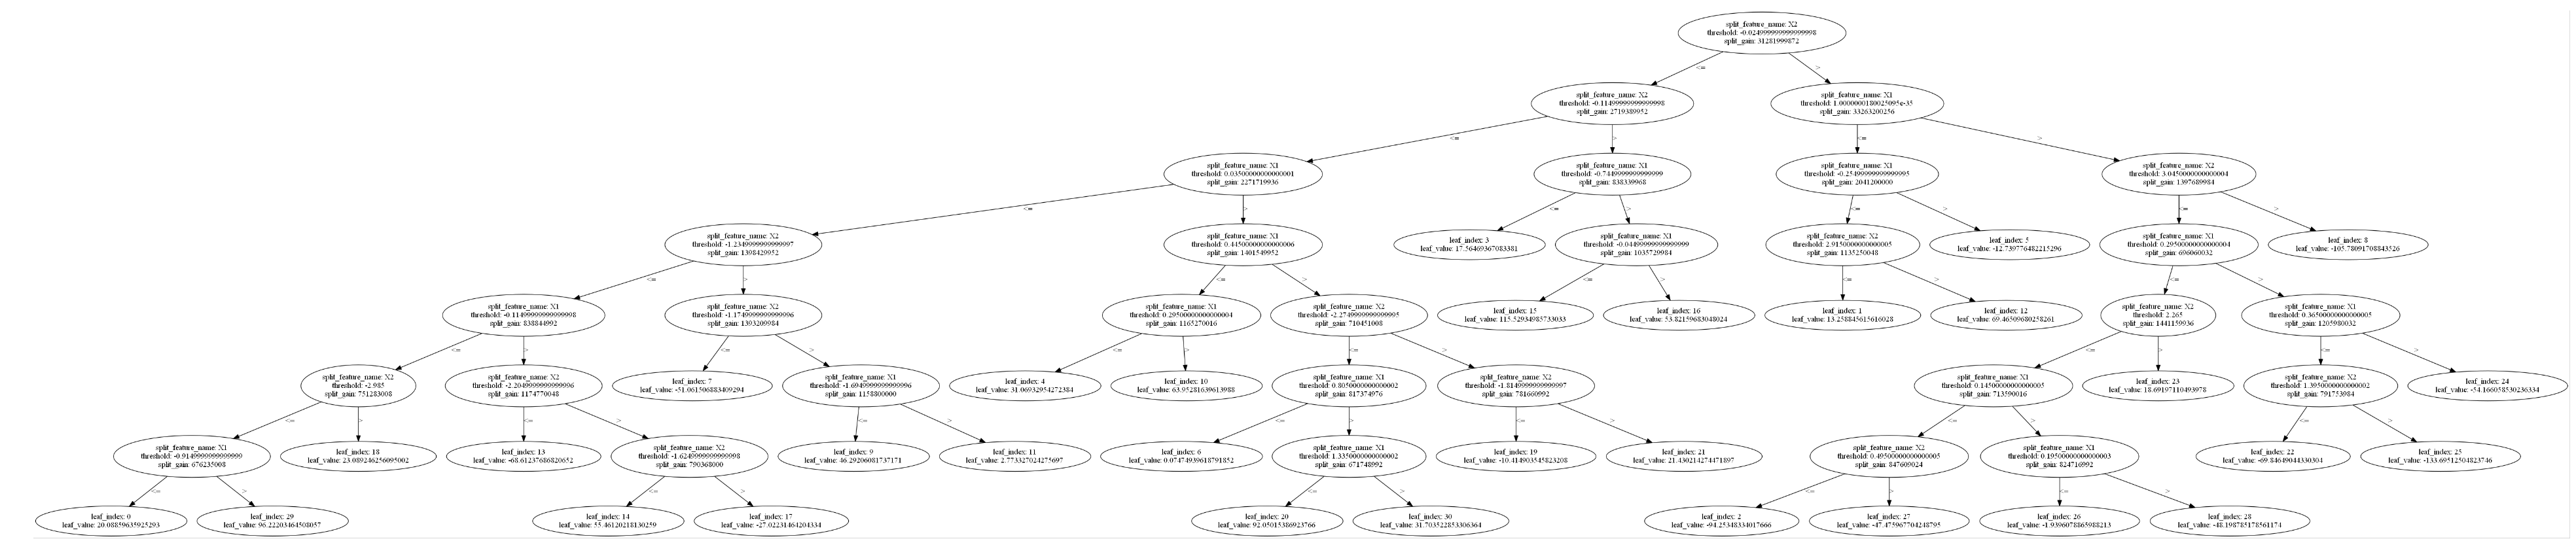

In [84]:
lightgbm.plot_importance(gbm)
plt.show()

lightgbm.plot_metric(evals_result, metric='l1', title='l1 Metric during training')
plt.show()

lightgbm.plot_metric(evals_result, metric='l2', title='l2 Metric during training')
plt.show()

lightgbm.plot_tree(gbm, tree_index=1, figsize=(50, 50), show_info=['split_gain'])
plt.show()

From the graph we can notice l1 loss to decrease linearly while l2 plateaus after 110 iterations.
After reaching the minima, l2 starts increasing after iter #140

### RMSE: Actual-Predicted

In [150]:
from sklearn.metrics import mean_squared_error

y_pred = gbm.predict(x_test)
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 15063.277540037572


Since the *y* value is in seconds, RMSE seems high. On changing *y* to hours, RMSE decreases. 

### Writing Test/Eval dataset to disk

In [155]:
def convertToTime(x):
    hrs=int(x/3600)
    mins=int((x%3600)/60)
    return format(hrs, '02d') +":"+ format(mins, '02d')

output=pd.DataFrame(x_test, columns=['X1','X2','X3'])
output['min_TS']=y_pred
output.min_TS=output.min_TS.apply(convertToTime)
output.head()

,X1,X2,X3,min_TS
0,-0.46,-0.19,3.0,13:13
1,-0.02,0.54,0.0,12:30
2,-0.16,-2.32,2.0,13:43
3,-2.23,-0.89,3.0,13:31
4,-1.55,-0.55,2.0,13:19


In [147]:
output.to_csv("submission.csv", index=False)